In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv')

# Display basic information and first few rows
print(df.info())
print(df.head())

# Focus on the relevant columns (Text and Sentiment)
df = df[['Text', 'Sentiment']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)


# Text Cleaning Functions
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply text cleaning
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Check the cleaned output
print(df.head())

# Analyze the cleaned data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2  

In [4]:
df['Sentiment'] = df['Sentiment'].str.strip()
df['Sentiment'] = df['Sentiment'].str.lower()
replace_dict = {
    'positive': 'happy', 'joy': 'happy', 'serenity': 'happy', 'euphoria': 'happy',
    'elation': 'happy', 'happiness': 'happy', 'playful': 'happy', 'amusement': 'happy',
    'despair': 'sad', 'grief': 'sad', 'regret': 'sad', 'melancholy': 'sad',
    'negative': 'sad', 'bad': 'sad', 'loneliness': 'sad', 'desolation': 'sad',
    'excitement': 'excited', 'thrill': 'excited', 'adventure': 'excited',
    'enthusiasm': 'excited', 'inspired': 'excited', 'inspiration': 'excited', 'arousal': 'excited',
    'hate': 'angry', 'disgust': 'angry', 'bitterness': 'angry', 'betrayal': 'angry',
    'frustration': 'angry', 'frustrated': 'angry', 'anger': 'angry',
    'pride': 'proud', 'admiration': 'proud', 'awe': 'proud', 'reverence': 'proud',
    'contentment': 'content', 'acceptance': 'content', 'fulfillment': 'content',
    'calmness': 'content', 'satisfaction': 'content',
    'indifference': 'neutral', 'numbness': 'neutral', 'ambivalence': 'neutral',
    'hope': 'hopeful', 'determination': 'hopeful', 'resilience': 'hopeful', 'empowerment': 'hopeful',
    'shame': 'embarassed', 'embarassment': 'embarassed',
    'gratitude': 'grateful',
    'compassionate': 'compassion', 'tenderness': 'compassion', 'empathetic': 'compassion'
}

df['Sentiment'] = df['Sentiment'].replace(replace_dict)


In [5]:
print("Unique Sentiments:", df['Sentiment'].value_counts())
print("Sample Cleaned Text:", df['Cleaned_Text'].head())

Unique Sentiments: Sentiment
happy             146
excited            66
sad                64
content            38
neutral            36
                 ... 
emotionalstorm      1
suffering           1
marvel              1
spark               1
freedom             1
Name: count, Length: 144, dtype: int64
Sample Cleaned Text: 0          enjoying a beautiful day at the park
1             traffic was terrible this morning
2              just finished an amazing workout
3    excited about the upcoming weekend getaway
4    trying out a new recipe for dinner tonight
Name: Cleaned_Text, dtype: object


In [6]:
import pandas as pd
from sklearn.utils import resample

# Combine rare classes (less than 10 samples) into 'Other'
rare_threshold = 10
sentiment_counts = df['Sentiment'].value_counts()

# # Map rare classes to 'Other'
rare_classes = sentiment_counts[sentiment_counts < rare_threshold].index
df['Sentiment'] = df['Sentiment'].apply(lambda x: 'Other' if x in rare_classes else x)

print("Unique Sentiments:", df['Sentiment'].value_counts())
# print("Balanced dataset created and saved.")


Unique Sentiments: Sentiment
Other         228
happy         146
excited        66
sad            64
content        38
neutral        36
angry          34
proud          28
hopeful        28
grateful       22
curiosity      16
compassion     15
nostalgia      11
Name: count, dtype: int64


In [7]:
label_encoder = LabelEncoder()
df['Sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Display label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'Other': 0, 'angry': 1, 'compassion': 2, 'content': 3, 'curiosity': 4, 'excited': 5, 'grateful': 6, 'happy': 7, 'hopeful': 8, 'neutral': 9, 'nostalgia': 10, 'proud': 11, 'sad': 12}


In [8]:
# Drop rows with missing text or sentiment
df.dropna(subset=['Text', 'Sentiment'], inplace=True)

# Verify the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Text               732 non-null    object
 1   Sentiment          732 non-null    object
 2   Cleaned_Text       732 non-null    object
 3   Sentiment_encoded  732 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 23.0+ KB
None
                                                Text Sentiment  \
0   Enjoying a beautiful day at the park!        ...     happy   
1   Traffic was terrible this morning.           ...       sad   
2   Just finished an amazing workout! 💪          ...     happy   
3   Excited about the upcoming weekend getaway!  ...     happy   
4   Trying out a new recipe for dinner tonight.  ...   neutral   

                                 Cleaned_Text  Sentiment_encoded  
0        enjoying a beautiful day at the park                  7  
1           traffic was ter

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
# Check for null values
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_Text'],            # Input features (cleaned text)
    df['Sentiment_encoded'],       # Target (encoded sentiment)
    test_size=0.2,                 # 80/20 split
    random_state=42,               # Reproducibility
    stratify=df['Sentiment_encoded'] # Maintain class balance
)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")
#Initialize TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=50000,          # Allow up to 10k words for richer features
    stop_words='english',         # Remove common stop words
    ngram_range=(1, 2),           # Capture both unigrams and bigrams
    min_df=2,                     # Ignore words that appear in less than 2 documents
    max_df=0.85,                  # Ignore words that appear in more than 85% of documents
    sublinear_tf=True             # Apply logarithmic frequency scaling
)

# Transform the dataset
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of TF-IDF (Train):", X_train_tfidf.shape)
print("Shape of TF-IDF (Test):", X_test_tfidf.shape)






Training Samples: 585, Testing Samples: 147
Shape of TF-IDF (Train): (585, 1175)
Shape of TF-IDF (Test): (147, 1175)


In [10]:
# Preview TF-IDF matrices and encoded labels
print(X_train_tfidf[:3].toarray())
print(y_train[:3])

# Inspect the TF-IDF feature names (optional)
print(tfidf_vectorizer.get_feature_names_out()[:10])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
284    2
386    6
396    0
Name: Sentiment_encoded, dtype: int64
['abstract' 'abstract art' 'abyss' 'academic' 'acceptance' 'accidentally'
 'accomplished' 'accomplishment' 'achieve' 'achieved']


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the improved MLP model
mlp_model = Sequential()

# Input layer with Batch Normalization
mlp_model.add(Dense(2048, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.4))

# Additional Hidden layers
mlp_model.add(Dense(1024, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.4))

mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.3))

mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.3))

# Output layer
num_classes = len(np.unique(y_train))
mlp_model.add(Dense(num_classes, activation='softmax'))

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

mlp_model.summary()

# Train the model
history = mlp_model.fit(X_train_tfidf, y_train,
                        validation_data=(X_test_tfidf, y_test),
                        epochs=100,
                        batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2048)                │       2,408,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 13)                  │           3,341 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,181,453 (19.77 MB)

 Trainable params: 5,173,773 (19.74 MB)

 Non-trainable params: 7,680 (30.00 KB)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.1161 - loss: 3.4356 - val_accuracy: 0.3129 - val_loss: 2.5187
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3891 - loss: 1.9635 - val_accuracy: 0.3333 - val_loss: 2.4648
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6700 - loss: 1.0328 - val_accuracy: 0.3265 - val_loss: 2.3915
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8183 - loss: 0.6201 - val_accuracy: 0.3129 - val_loss: 2.3097
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9229 - loss: 0.3298 - val_accuracy: 0.3129 - val_loss: 2.2495
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9303 - loss: 0.2389 - val_accuracy: 0.3129 - val_loss: 2.2077
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9617 - loss: 0.1806 - val_accuracy: 0.3129 - val_loss: 2.1907
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9855 - loss: 0.0951 - val_accuracy: 0.

In [12]:

final_accuracy = mlp_model.evaluate(X_test_tfidf, y_test, verbose=0)[1]
print(f"Final Test Accuracy: {final_accuracy:.4f}")


Final Test Accuracy: 0.5782


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


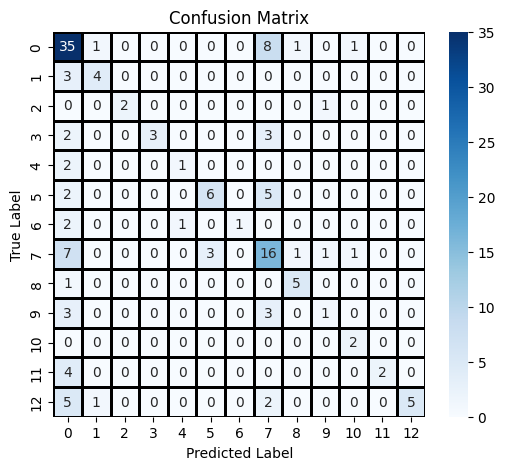

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Evaluate on the test set
y_pred = np.argmax(mlp_model.predict(X_test_tfidf), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="black")

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the model
mlp_model_leakyrelu = Sequential()

# Input layer
mlp_model_leakyrelu.add(Dense(2048, input_shape=(X_train_tfidf.shape[1],)))
mlp_model_leakyrelu.add(LeakyReLU(alpha=0.1))
mlp_model_leakyrelu.add(BatchNormalization())
mlp_model_leakyrelu.add(Dropout(0.2))

# Hidden layers
for units in [1024, 512, 256]:
    mlp_model_leakyrelu.add(Dense(units))
    mlp_model_leakyrelu.add(LeakyReLU(alpha=0.1))
    mlp_model_leakyrelu.add(BatchNormalization())
    mlp_model_leakyrelu.add(Dropout(0.3))

# Output layer
num_classes = len(np.unique(y_train))
mlp_model_leakyrelu.add(Dense(num_classes, activation='softmax'))

# Compile the model
mlp_model_leakyrelu.compile(optimizer=Adam(learning_rate=0.001),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model
history_leakyrelu = mlp_model_leakyrelu.fit(X_train_tfidf, y_train,
                                            validation_data=(X_test_tfidf, y_test),
                                            epochs=100,
                                            batch_size=64,
                                            callbacks=[lr_scheduler])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.1229 - loss: 3.4540 - val_accuracy: 0.3129 - val_loss: 2.4885 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6893 - loss: 0.9395 - val_accuracy: 0.3129 - val_loss: 2.3777 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9058 - loss: 0.3980 - val_accuracy: 0.3129 - val_loss: 2.2777 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9499 - loss: 0.1976 - val_accuracy: 0.3129 - val_loss: 2.2027 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9831 - loss: 0.1129 - val_accuracy: 0.3129 - val_loss: 2.1641 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9890 - loss: 0.0513 - val_accuracy: 0.3129 - val_loss: 2.1392 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9995 - loss: 0.0480 -

In [18]:
results = {
    'LeakyReLU': mlp_model_leakyrelu.evaluate(X_test_tfidf, y_test)
}

for name, (loss, accuracy) in results.items():
    print(f"{name} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6267 - loss: 2.0143
LeakyReLU - Loss: 2.1990, Accuracy: 0.6054


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


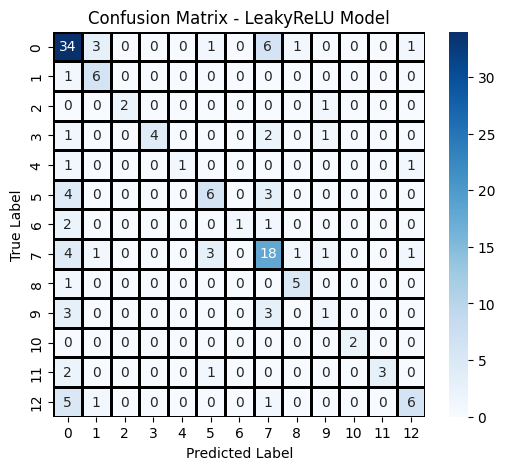

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate model and get predictions
y_pred_leakyrelu = np.argmax(mlp_model_leakyrelu.predict(X_test_tfidf), axis=1)

# Compute confusion matrix
cm_leakyrelu = confusion_matrix(y_test, y_pred_leakyrelu)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_leakyrelu, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="black")

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LeakyReLU Model")

# Show the plot
plt.show()
